# Objectives
- Analyzing Factors that promotes customer retention (low churn) in a telecom company.
- Obtaining Business insights to reducing customer churn rate



# Installing/importing Requirements

In [3]:
!pip install opendatasets 
!pip install dash

In [4]:
import pandas as pd
import os
import opendatasets as od
import pandas as pd
import numpy as np
from numpy import mean
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import KBinsDiscretizer
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# Downloading and reading the Data from Kaggle

In [6]:
try:
    od.download(
        "https://www.kaggle.com/datasets/blastchar/telco-customer-churn/download?datasetVersionNumber=1"
    )
except:
    pass

Skipping, found downloaded files in ".\telco-customer-churn" (use force=True to force download)


In [7]:
df=pd.read_csv('telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Check for missing values

In [15]:
df.replace(' ', np.nan, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Observation
- TotalCharges columns has 11 rows with missing columns.
- Since this is just a small percentage if the total data, we can remove the rows with missing values

# Handling missing values

In [17]:
df.dropna(axis=0, inplace = True)

# drop columns with high variability
df.drop(['customerID'],axis=1,inplace=True)

# covert totalcharges to a float column after removing missing values
df['TotalCharges']=df['TotalCharges'].astype('float')


# Separting dependent Variable from independent Variables

In [18]:
#separating target variable from independent variable 
churn = le.fit_transform(df['Churn'])
df.drop('Churn', axis =1, inplace =True)

# Separating the categorical from continuous variables

In [19]:
df_category=pd.DataFrame()
df_float=pd.DataFrame()
for x in df.columns:
    if df[x].nunique()>50:
        df_float[x]=df[x]
    else:
        df_category[x]=df[x]
    

# Analyzing the continuous data

In [20]:
df_float['Churn']=churn
df_float.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,0
1,34,56.95,1889.50,0
2,2,53.85,108.15,1
3,45,42.30,1840.75,0
4,2,70.70,151.65,1


# Statistical Summary 
- To get the 5 point summary of the data

In [21]:
df_float.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


#### observation
- The TotalCharges column might contain outliers as the differnce between the mean and median appears significant

# Confirming outliers by checking the skewness | distribution |  lower and upper percentile

### Checking the distribution of each column

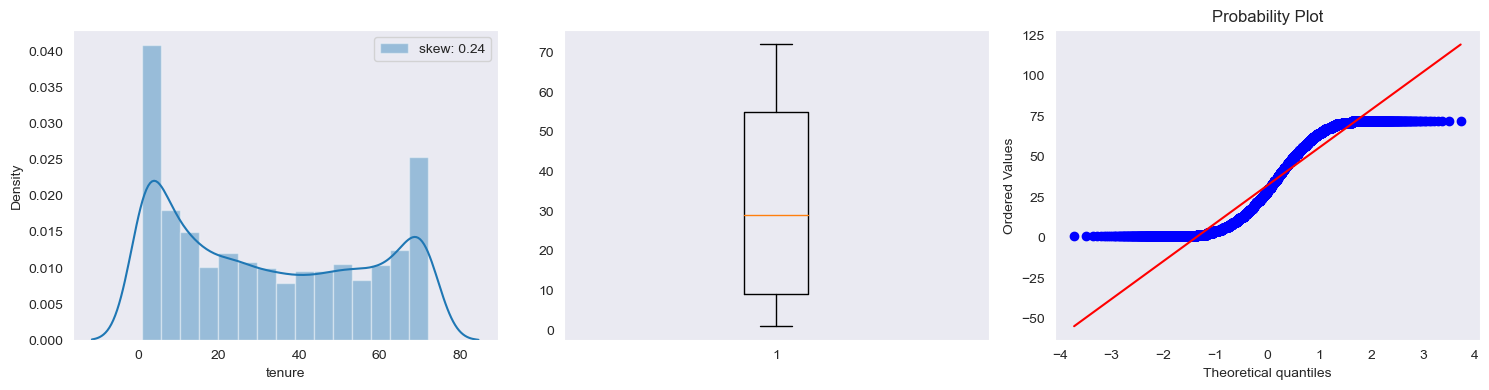

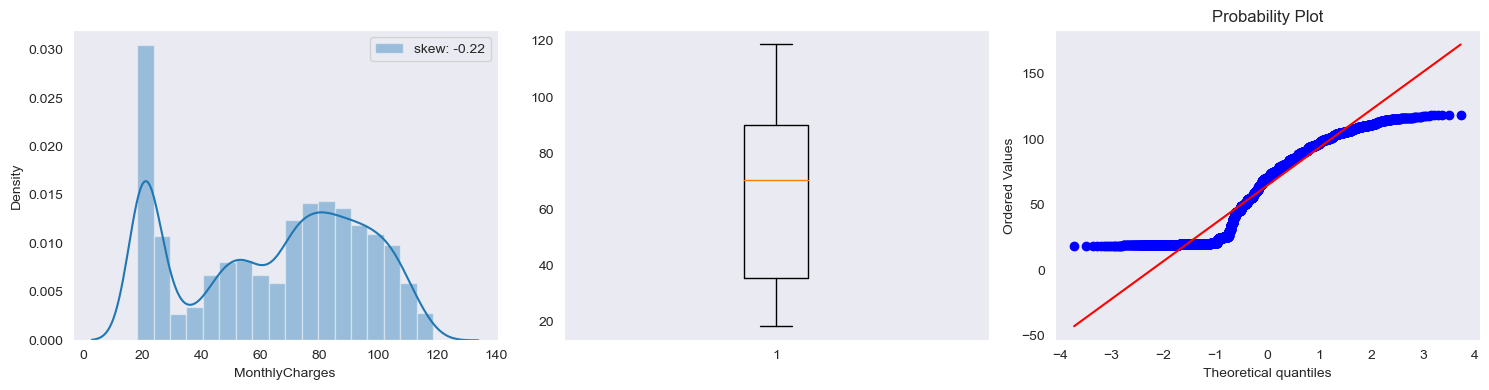

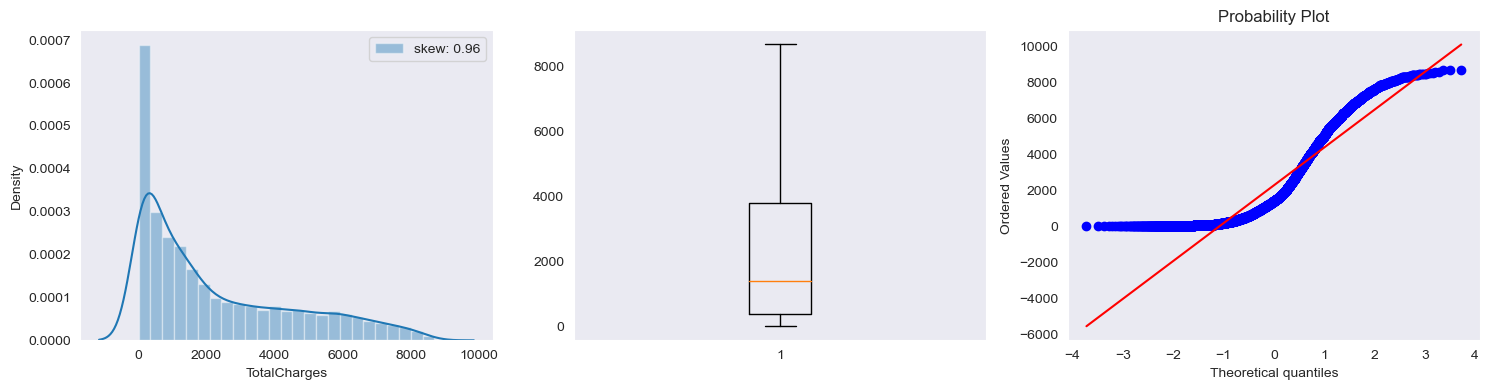

In [22]:
#from this plots, we can see the distribution and nrrow down the columns to further confirm for outliers
warnings.filterwarnings('ignore')
sns.set_style('dark')
for col in df_float.columns[:-1]:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df_float[col], label='skew: '+ str(+np.round(df_float[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    plt.boxplot(df_float[col])
    plt.subplot(133)
    stats.probplot(df_float[col], plot=plt)
    plt.tight_layout()
    plt.show()
    

### checking the skewness of each column

In [23]:
#any value whose skewness is greater than 1 has a possbile chance of being an outlier
skewed=[]
for col in df_float.columns[:-1]:
    skewed.append(col)
    print('the skewness and max Z-score value for {} is {} and {}'.format(col,df_float[col].skew(),np.max(abs(stats.zscore(df_float[col])))))

the skewness and max Z-score value for tenure is 0.23773083190513133 and 1.6125732136881425
the skewness and max Z-score value for MonthlyCharges is -0.22210292770166232 and 1.7933814803098413
the skewness and max Z-score value for TotalCharges is 0.9616424997242504 and 2.8242613633457254


### Checking the lower and upper percentile

In [24]:
for x in df_float.columns[:-1]:
    print(df_float[x].quantile([0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1]))
    print()

0.05     1.0
0.10     2.0
0.25     9.0
0.50    29.0
0.75    55.0
0.90    69.0
0.95    72.0
0.96    72.0
0.97    72.0
0.98    72.0
0.99    72.0
1.00    72.0
Name: tenure, dtype: float64

0.05     19.6500
0.10     20.0500
0.25     35.5875
0.50     70.3500
0.75     89.8625
0.90    102.6450
0.95    107.4225
0.96    108.9500
0.97    110.1000
0.98    111.5690
0.99    114.7345
1.00    118.7500
Name: MonthlyCharges, dtype: float64

0.05      49.6050
0.10      84.6000
0.25     401.4500
0.50    1397.4750
0.75    3794.7375
0.90    5976.6400
0.95    6923.5900
0.96    7147.7060
0.97    7414.1485
0.98    7721.0960
0.99    8039.8830
1.00    8684.8000
Name: TotalCharges, dtype: float64



### From the lower and upper percentile of each feature
- we can conclude that there is no outliers in any column

# Bivariate analysis on continuous data

### Correlation Heatmap
- To observe linear relatonship between each continuous feature 

<AxesSubplot:>

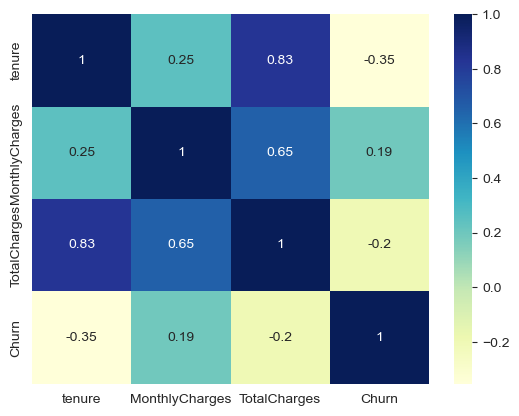

In [25]:
sns.heatmap(df_float.corr(),cmap='YlGnBu', annot=True)

#### Tenure and TotalCharges are highly positively correlated 
- This tells that there is a strong relationship between the two features
- As the Tenure of a customer increases, they are more likely to spend more


## Boxplots
- To observe how the median of each feature varies for churned customers and non-churned customers

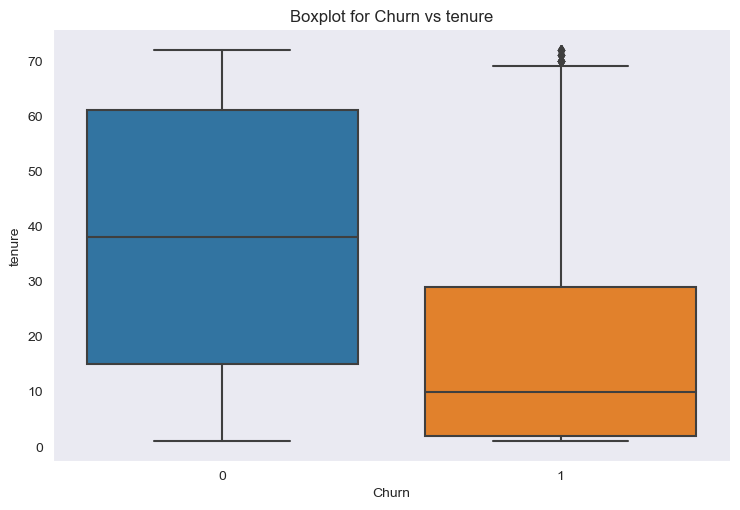

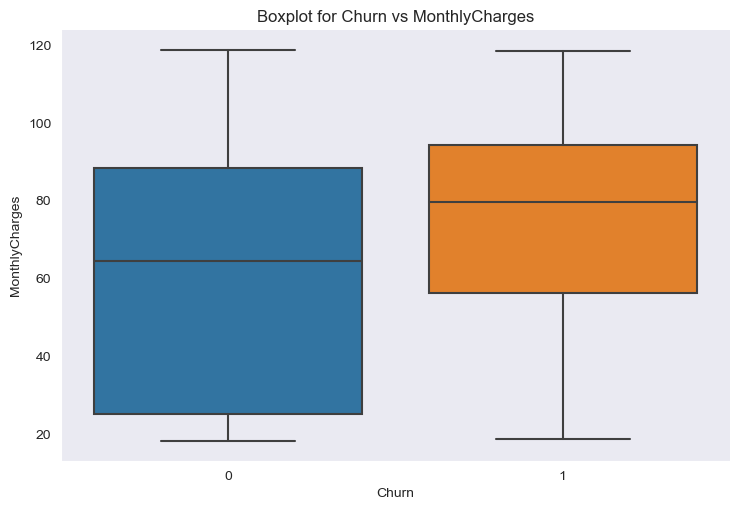

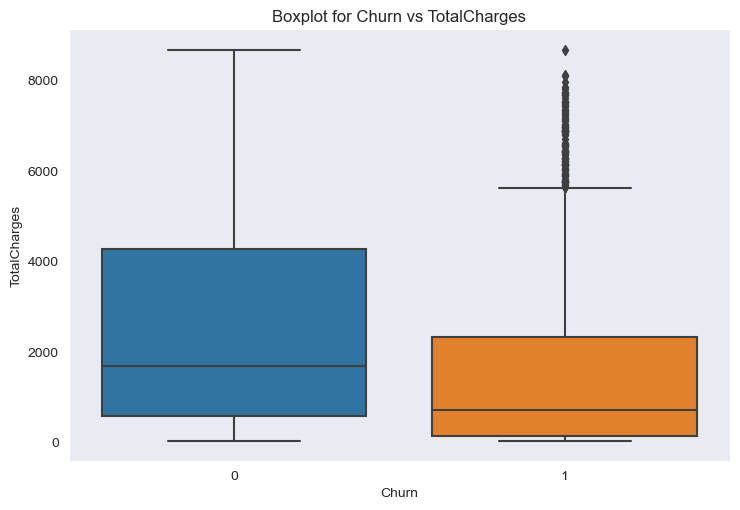

In [26]:
for x in df_float.columns[:-1]:
    sns.catplot(x="Churn", y=x, data=df_float, kind="box", aspect=1.5)
    plt.title(f"Boxplot for Churn vs {x}")
    plt.show()

#### I can infer that the median tenure for churned customers is lower than that of retained customers
- This can mean the longer a customer stays, the less likely it is for them to churn

## Scatter plots
- To visualise the relationship between features

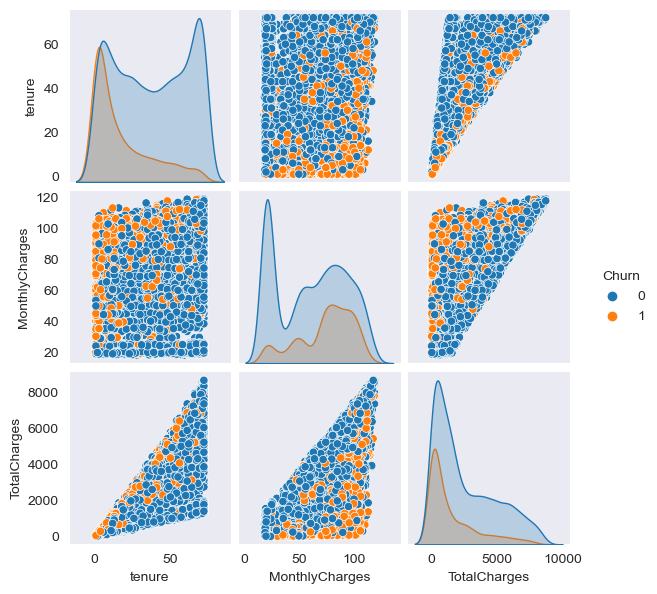

In [27]:
sns.pairplot(df_float, hue="Churn", size=2);

- no conclusive inference from the scatter plot, so we can bin each columns into groups

### Binning each column into high and low values
- This would convert continuous data to categorical data

In [28]:
for col in df_float.columns[:-1]:
    df_float[col]=np.where(df_float[col]>df_float[col].median(),f'High {col}',f'Low {col}')

In [29]:
for x in df_float.columns[:-1]:
    print(df_float[x].value_counts())
    print()

Low tenure     3558
High tenure    3474
Name: tenure, dtype: int64

Low MonthlyCharges     3519
High MonthlyCharges    3513
Name: MonthlyCharges, dtype: int64

Low TotalCharges     3516
High TotalCharges    3516
Name: TotalCharges, dtype: int64



### Countplots
- to see the number of data in each bin

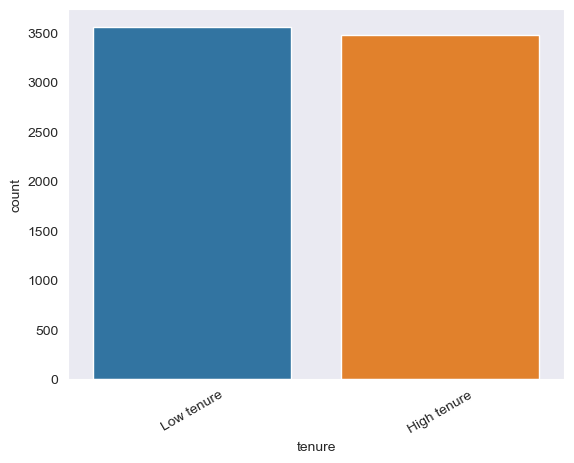

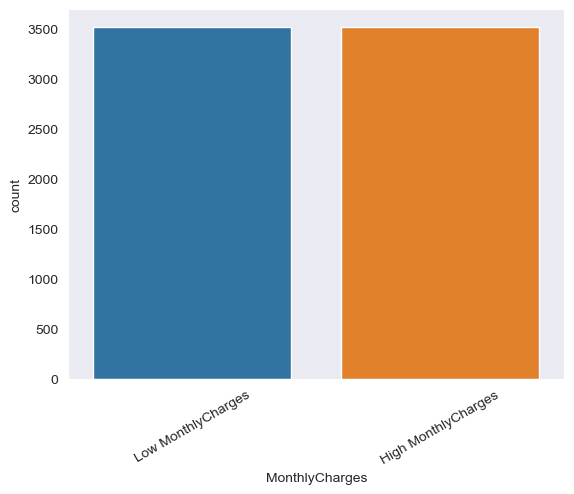

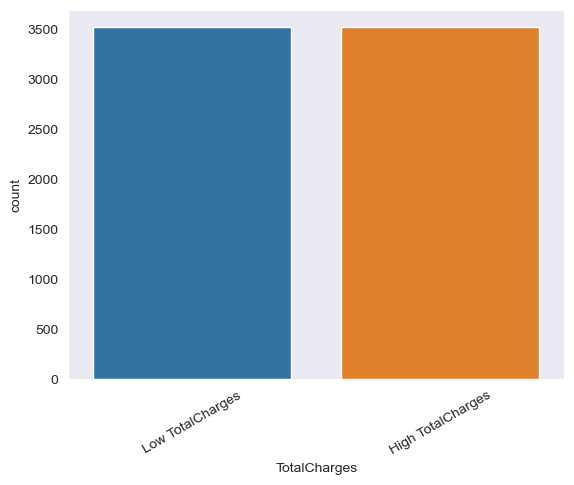

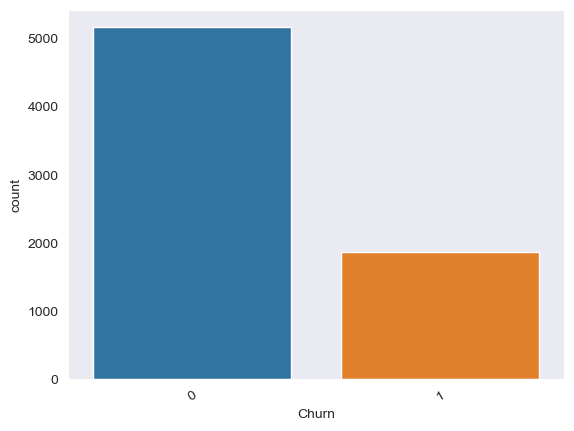

In [30]:
for col in df_float.columns:
    sns.countplot(x =col, data = df_float)
    plt.xticks(rotation=30)
    plt.show()

### Concatinating the binned continous data with categorical data

In [31]:
data = pd.concat([df_category, df_float],axis=1)

In [32]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,Low tenure,Low MonthlyCharges,Low TotalCharges,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,High tenure,Low MonthlyCharges,High TotalCharges,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Low tenure,Low MonthlyCharges,Low TotalCharges,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),High tenure,Low MonthlyCharges,High TotalCharges,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Low tenure,High MonthlyCharges,Low TotalCharges,1


# Analysis on Categorical Data

#### Checking the unique counts values in each column

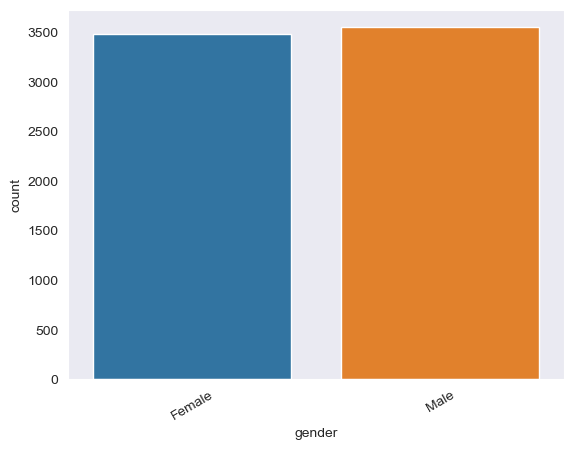

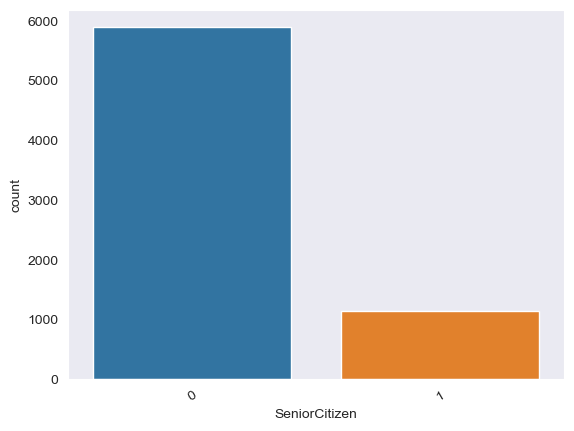

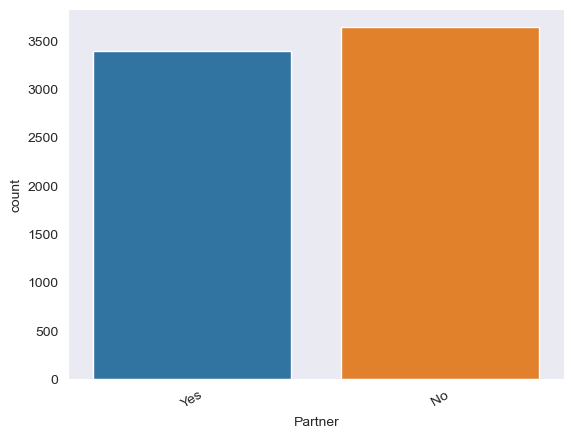

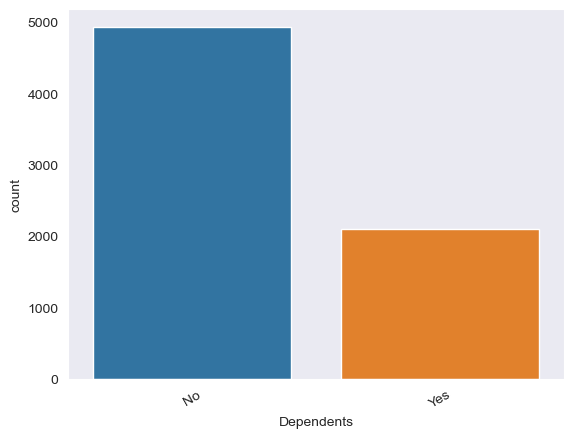

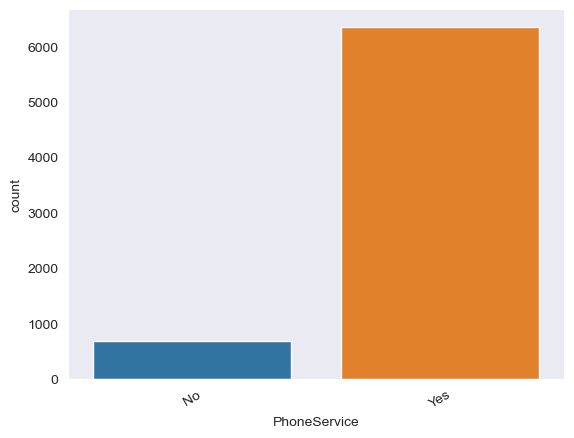

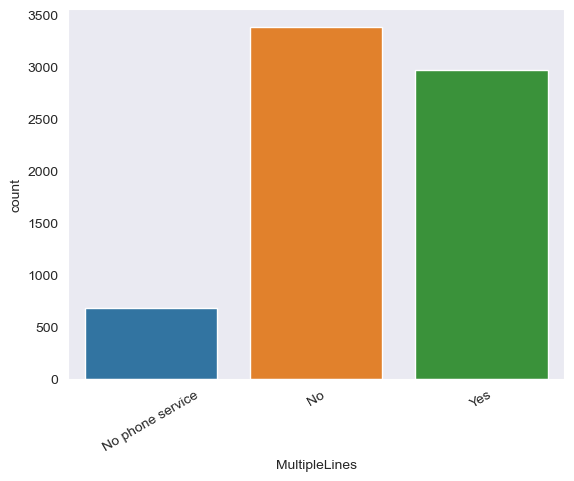

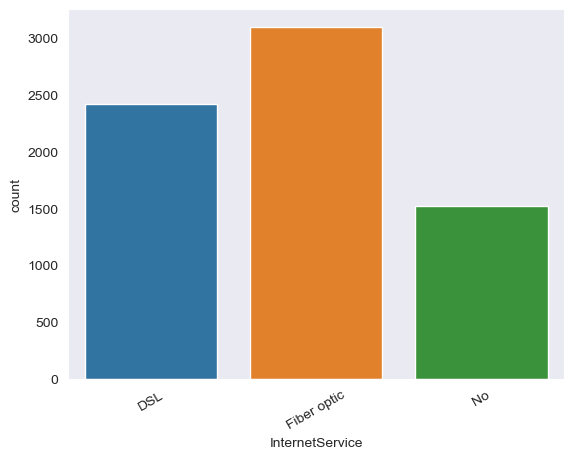

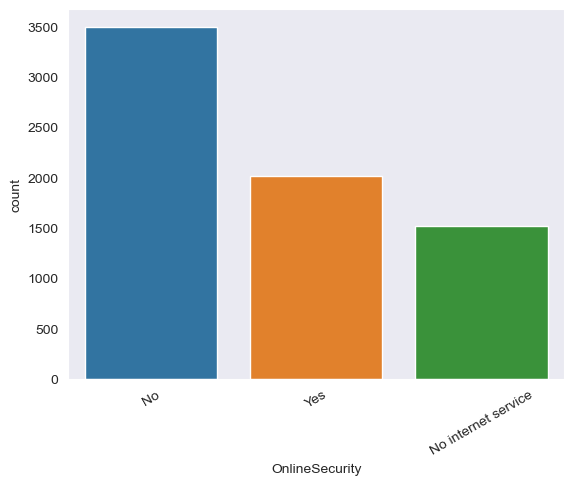

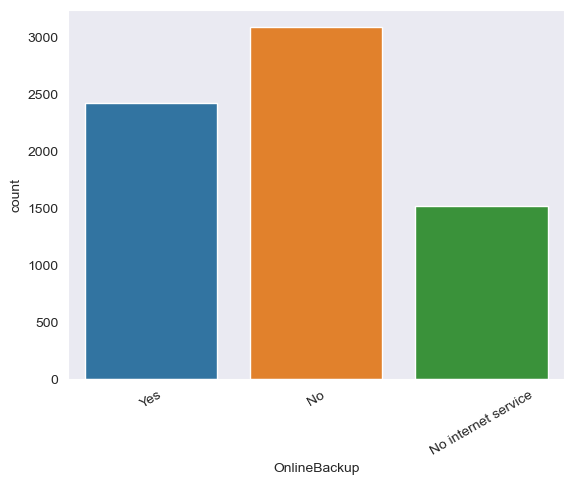

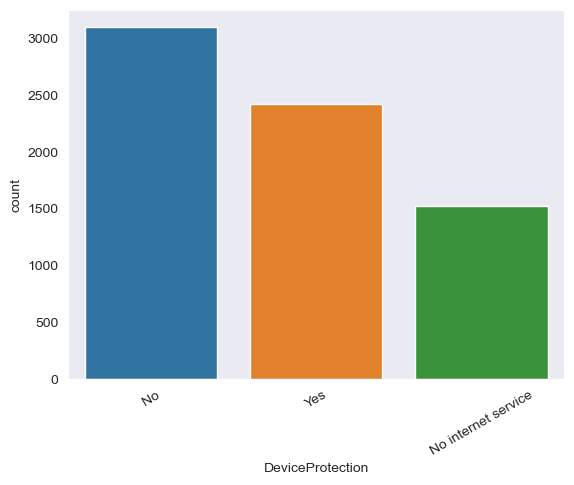

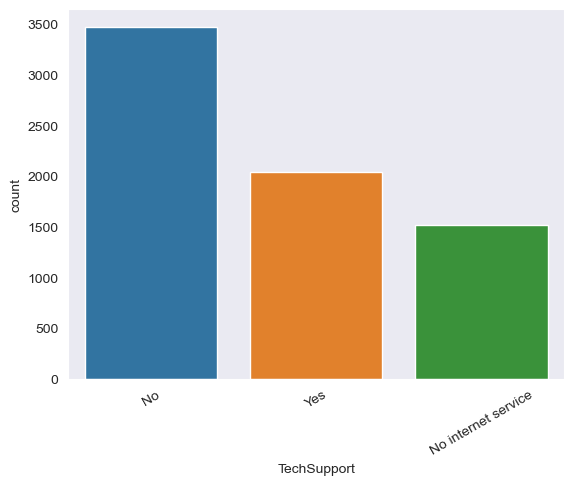

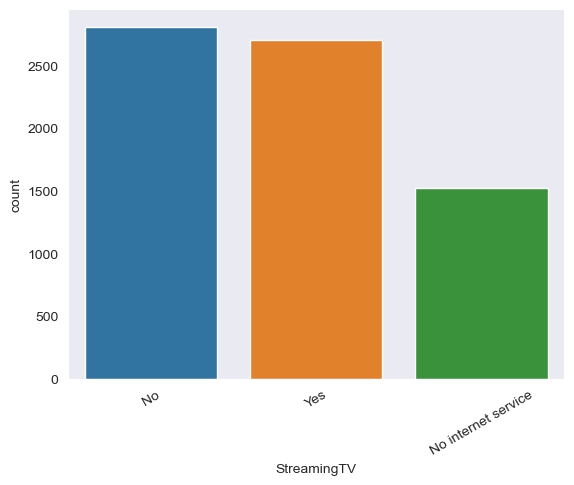

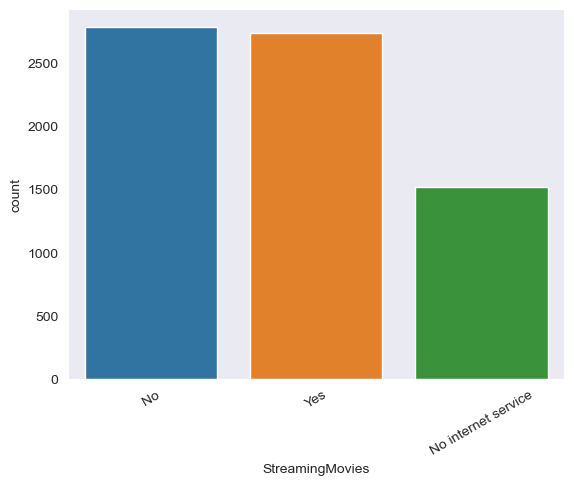

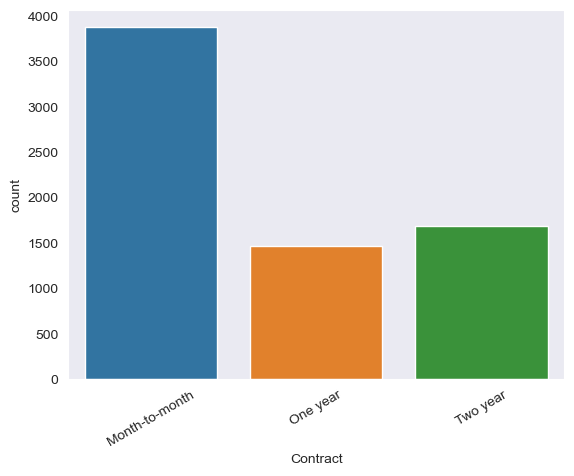

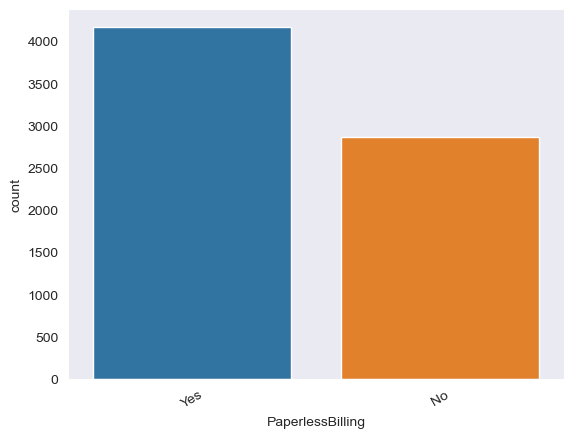

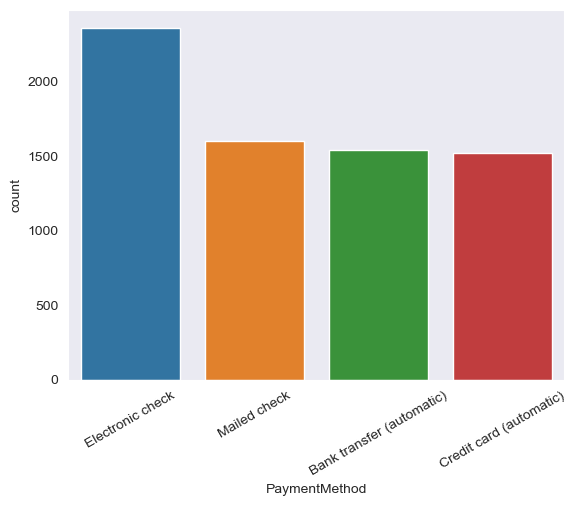

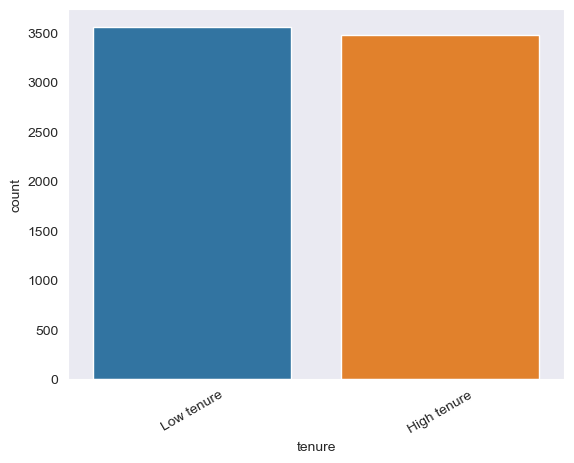

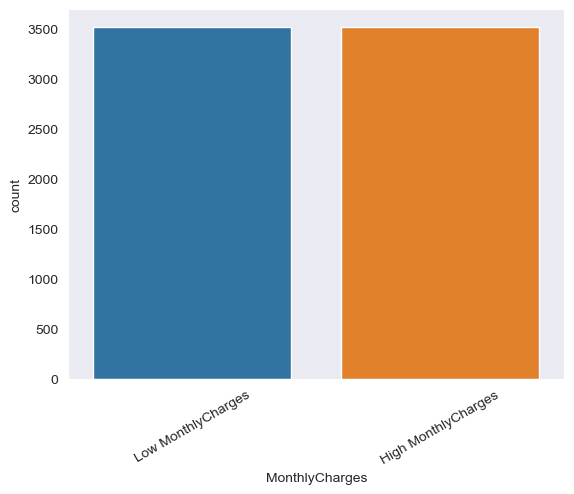

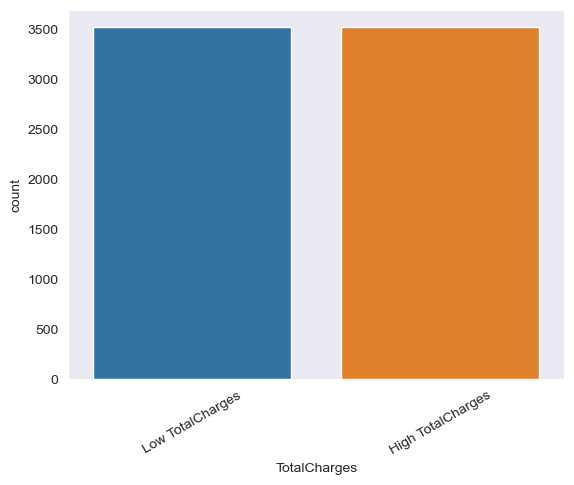

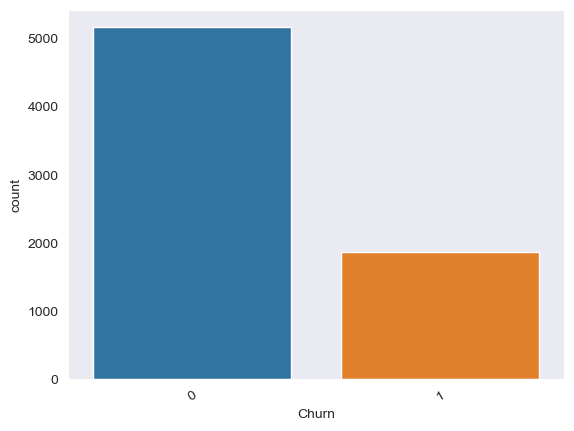

In [33]:
for column in data.columns:
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=30)
    plt.show()

### observation
- we can remove the PhoneService since 89% of the PhoneService is 'YES'

In [34]:
# removing the Phoneservice column
data.drop('PhoneService', axis=1, inplace=True)

## Statistical summary of categorical data

In [35]:
data.describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472
StreamingTV,7032,3,No,2809


## Barchart Plots                                                                  

#### For each feature
- check churn percntage of each unique value
- This helps to check the factor influncing churn rate

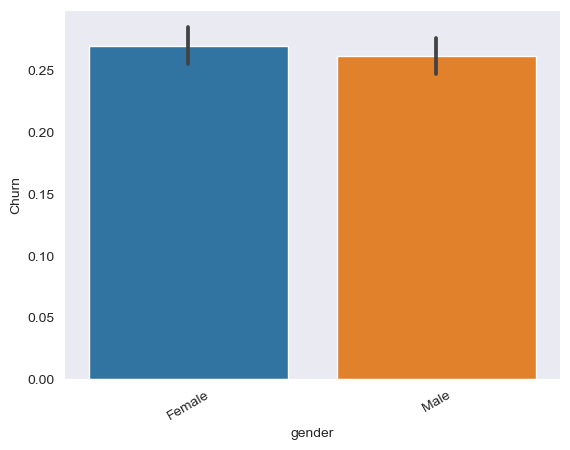

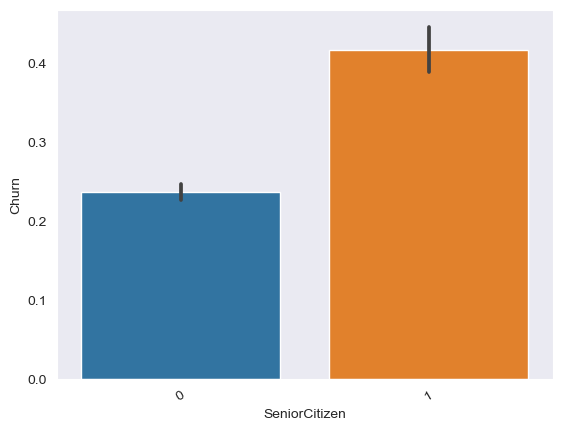

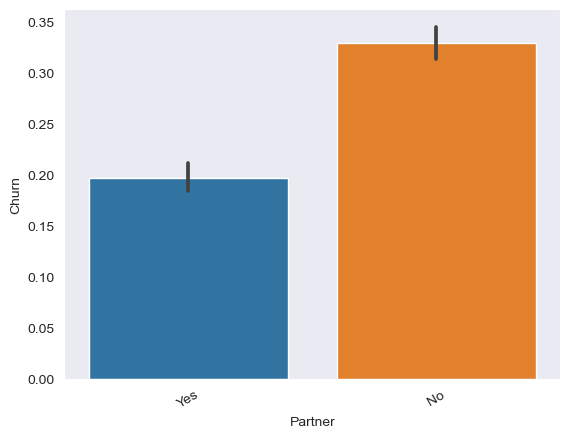

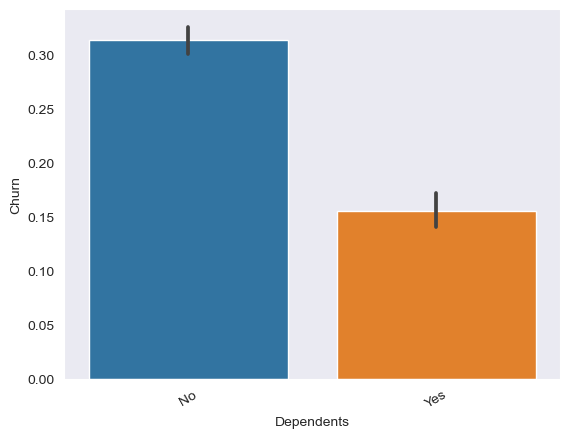

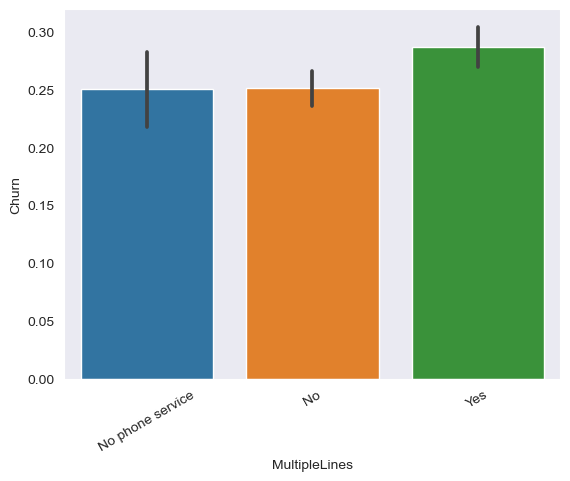

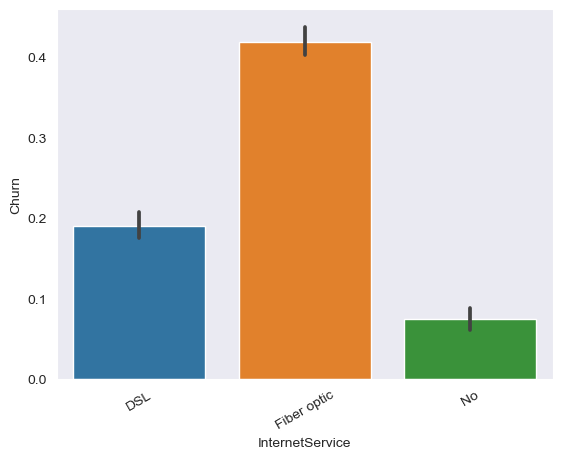

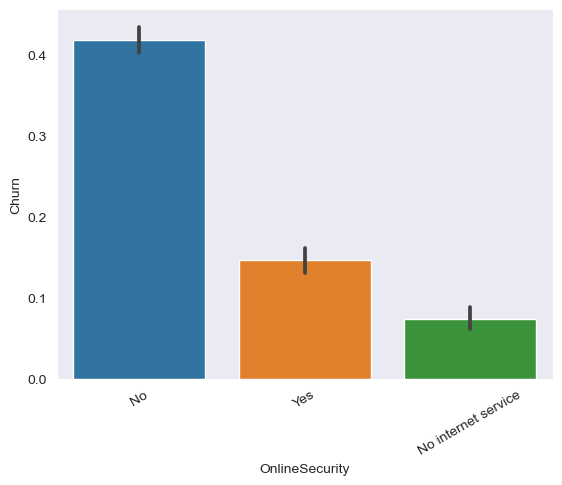

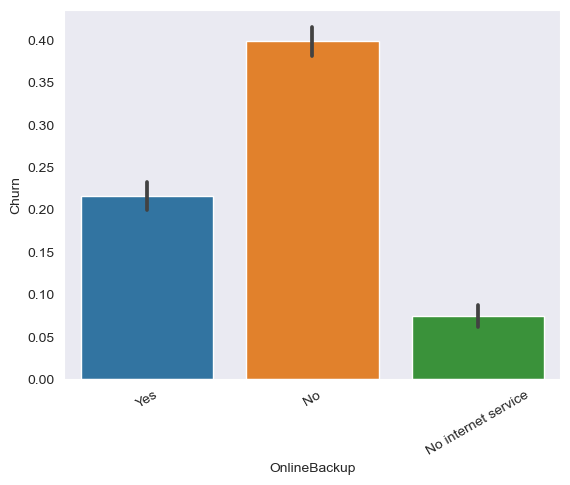

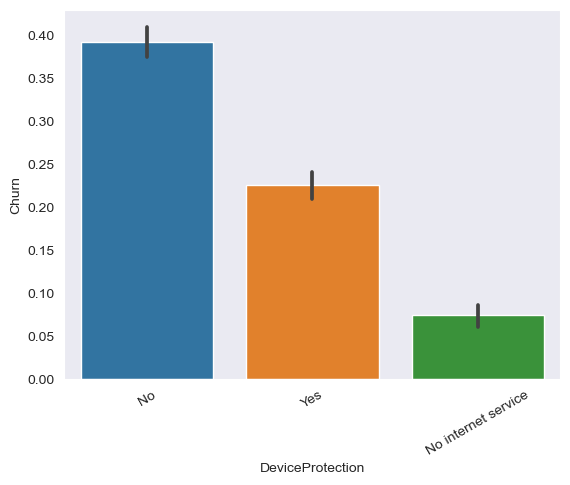

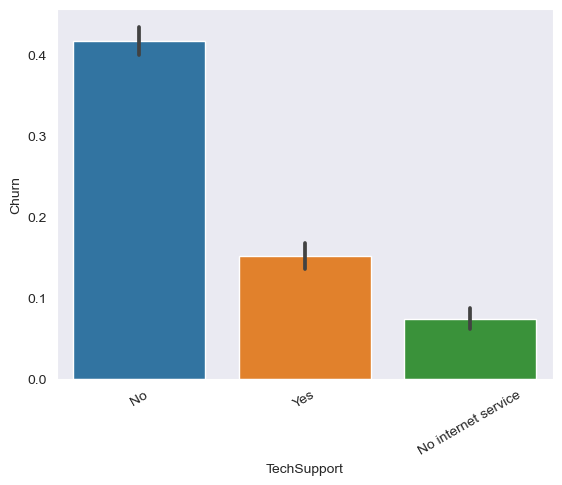

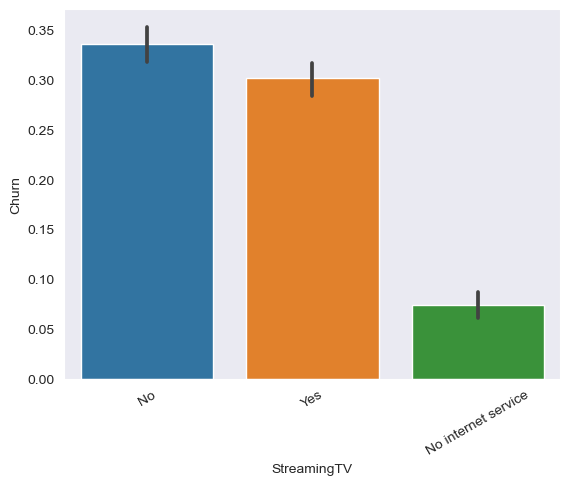

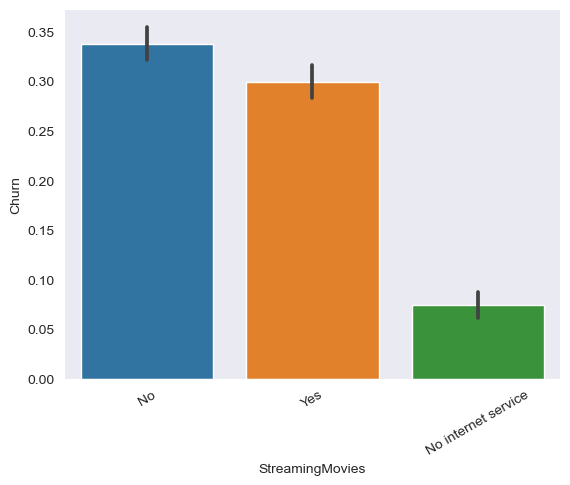

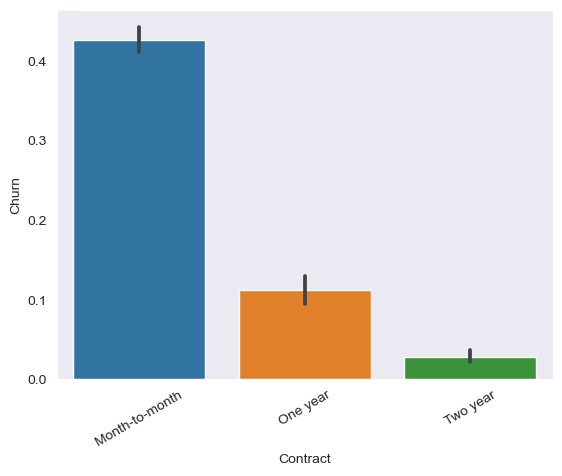

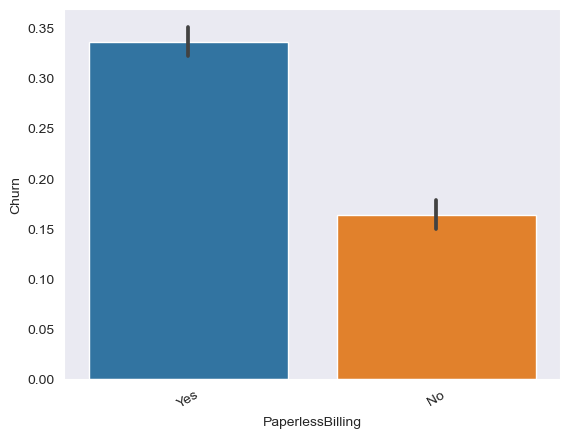

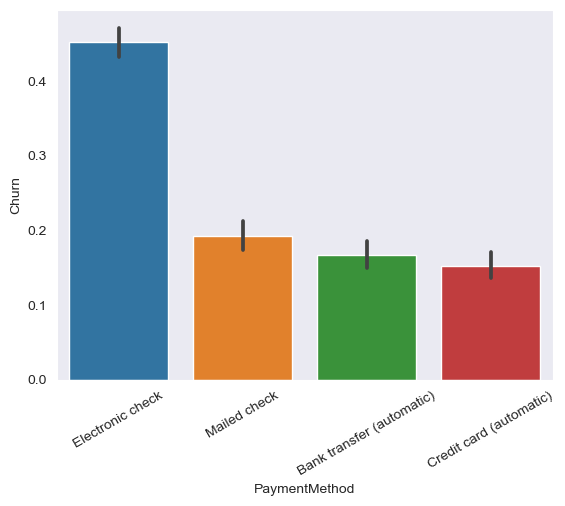

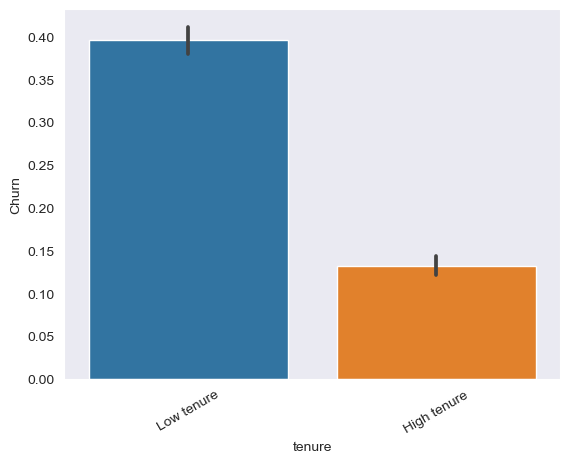

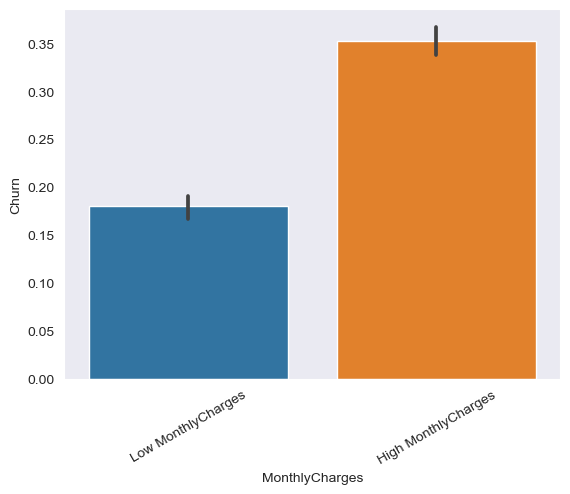

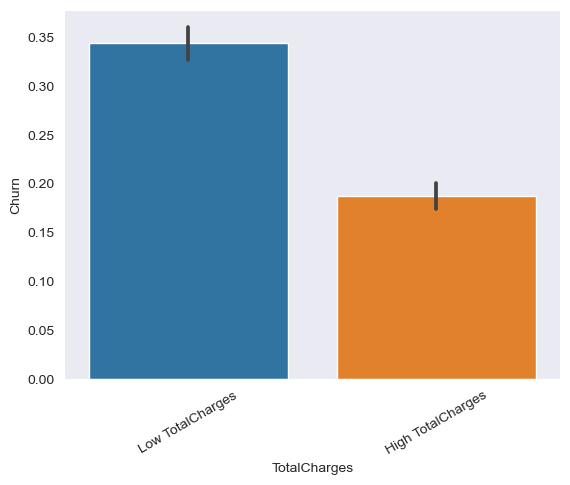

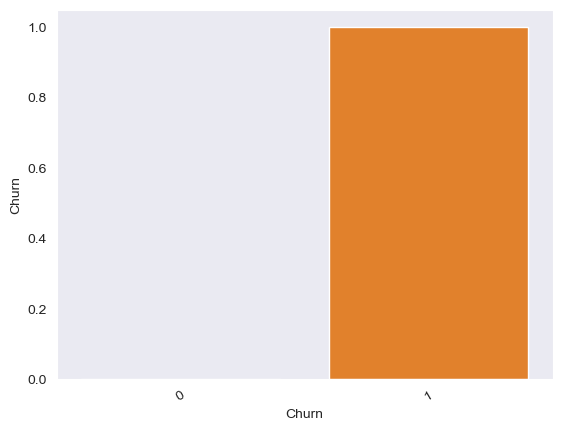

In [36]:
for col in data.columns:
    sns.barplot(x=col,y='Churn',data=data, estimator=mean)
    plt.xticks(rotation=30)
    plt.show()

### Observation
- features like 'Gender' and 'Multipleline' appear not to have big influence on churn rate
- the percentage of male churn is roughly equal to female churn
- feature engineering can be done by combining these columns with other columns

## Grouped Barchart
#### For each feature
- check churn percntage of each unique value
- give numerical values to churn
- get max churn and min churn for each feature
- get top 5 factors whose variability had maximum effect on churn rate

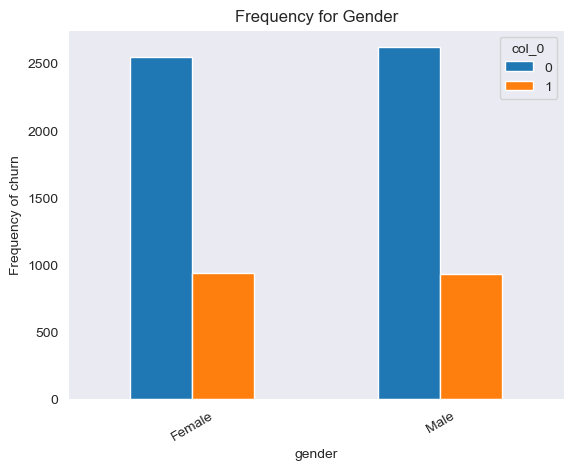

Female
of 3483 Female in gender 27.0% churned


Male
of 3549 Male in gender 26.2% churned




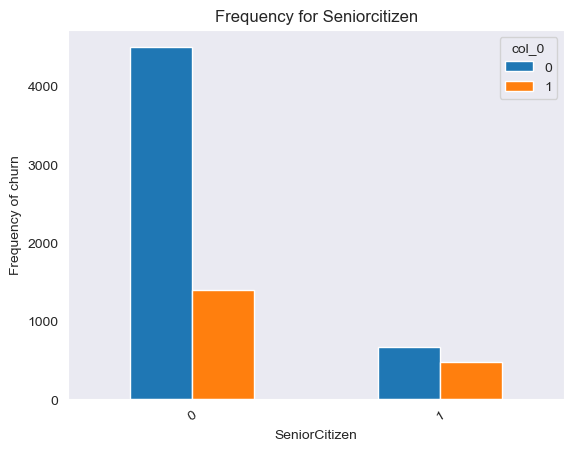

0
of 5890 0 in SeniorCitizen 23.7% churned


1
of 1142 1 in SeniorCitizen 41.7% churned




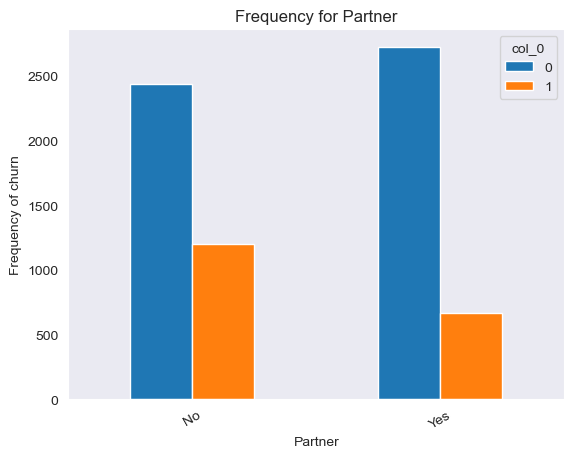

Yes
of 3393 Yes in Partner 19.7% churned


No
of 3639 No in Partner 33.0% churned




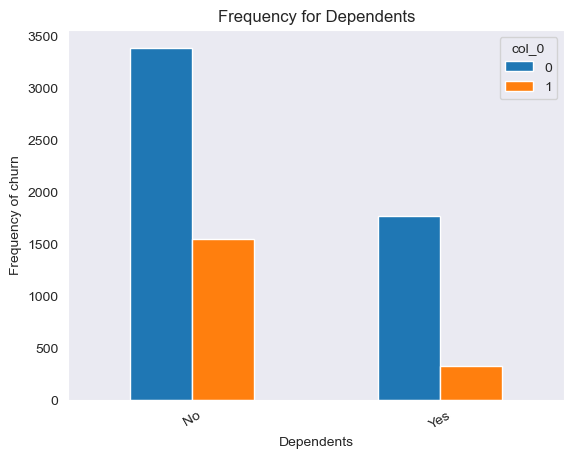

No
of 4933 No in Dependents 31.3% churned


Yes
of 2099 Yes in Dependents 15.5% churned




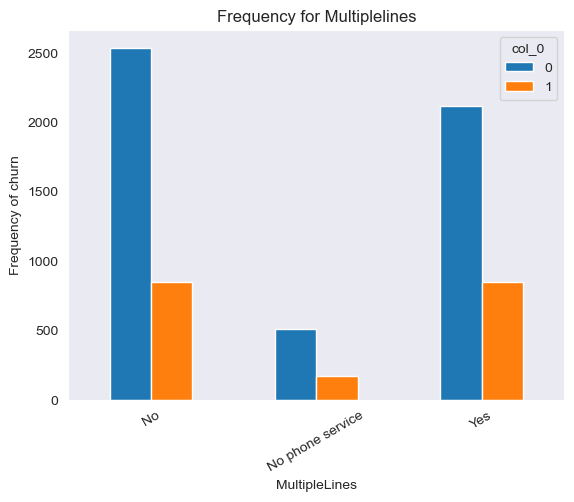

No phone service
of 680 No phone service in MultipleLines 25.0% churned


No
of 3385 No in MultipleLines 25.1% churned


Yes
of 2967 Yes in MultipleLines 28.6% churned




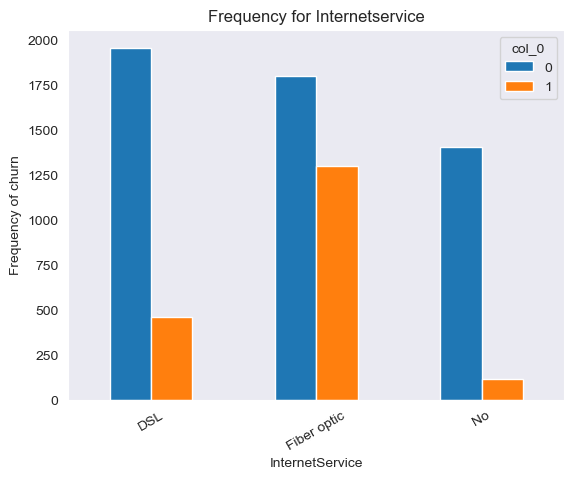

DSL
of 2416 DSL in InternetService 19.0% churned


Fiber optic
of 3096 Fiber optic in InternetService 41.9% churned


No
of 1520 No in InternetService 7.4% churned




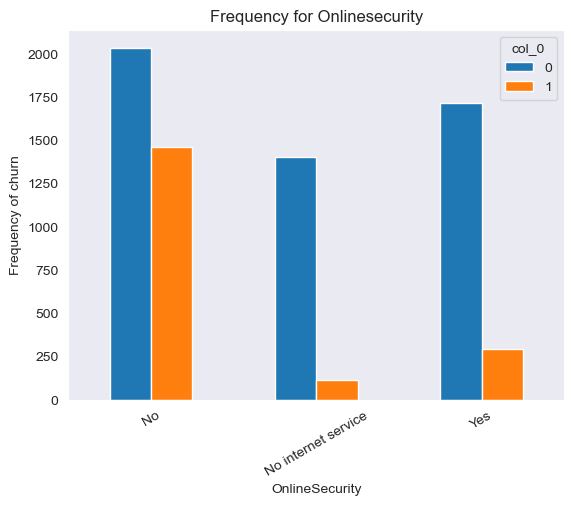

No
of 3497 No in OnlineSecurity 41.8% churned


Yes
of 2015 Yes in OnlineSecurity 14.6% churned


No internet service
of 1520 No internet service in OnlineSecurity 7.4% churned




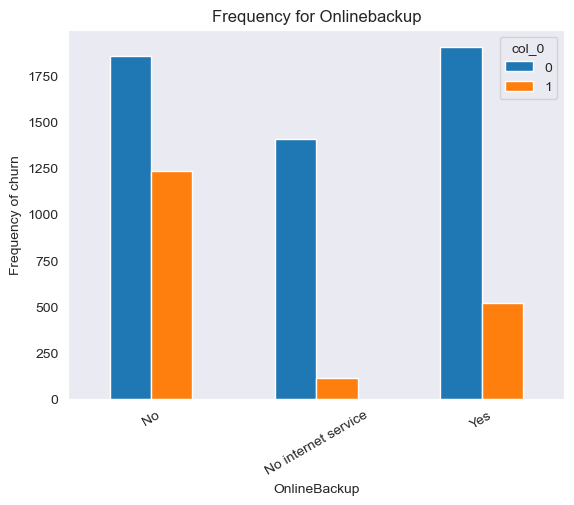

Yes
of 2425 Yes in OnlineBackup 21.6% churned


No
of 3087 No in OnlineBackup 39.9% churned


No internet service
of 1520 No internet service in OnlineBackup 7.4% churned




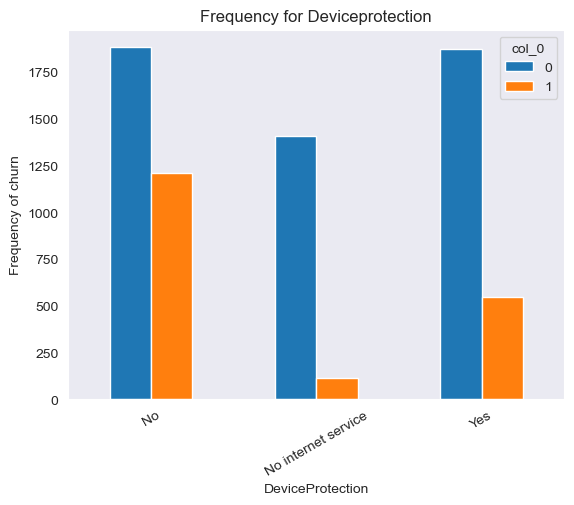

No
of 3094 No in DeviceProtection 39.1% churned


Yes
of 2418 Yes in DeviceProtection 22.5% churned


No internet service
of 1520 No internet service in DeviceProtection 7.4% churned




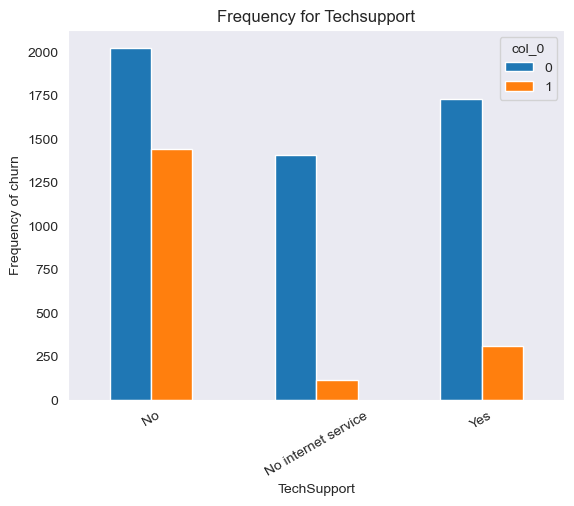

No
of 3472 No in TechSupport 41.6% churned


Yes
of 2040 Yes in TechSupport 15.2% churned


No internet service
of 1520 No internet service in TechSupport 7.4% churned




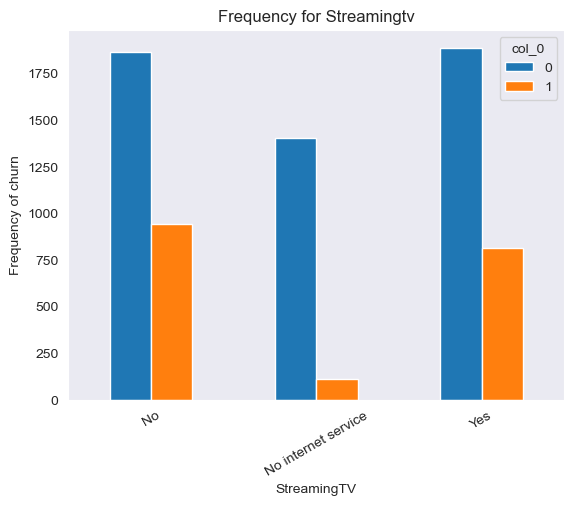

No
of 2809 No in StreamingTV 33.5% churned


Yes
of 2703 Yes in StreamingTV 30.1% churned


No internet service
of 1520 No internet service in StreamingTV 7.4% churned




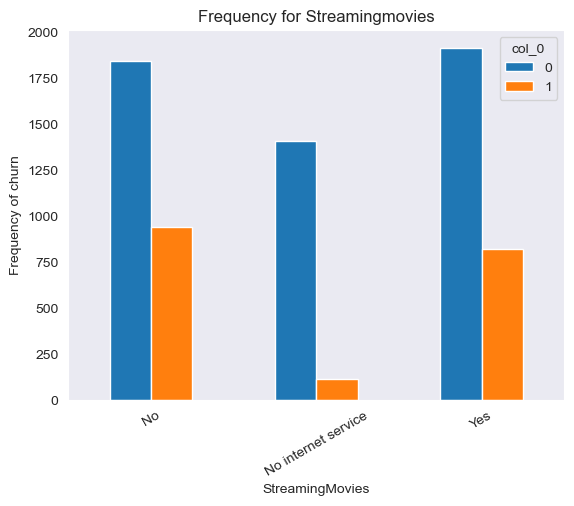

No
of 2781 No in StreamingMovies 33.7% churned


Yes
of 2731 Yes in StreamingMovies 30.0% churned


No internet service
of 1520 No internet service in StreamingMovies 7.4% churned




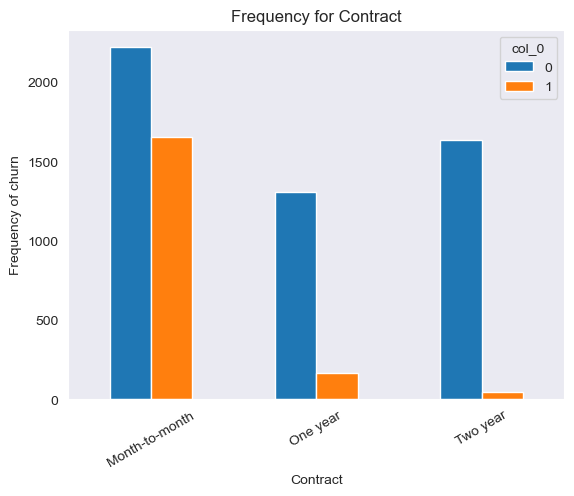

Month-to-month
of 3875 Month-to-month in Contract 42.7% churned


One year
of 1472 One year in Contract 11.3% churned


Two year
of 1685 Two year in Contract 2.8% churned




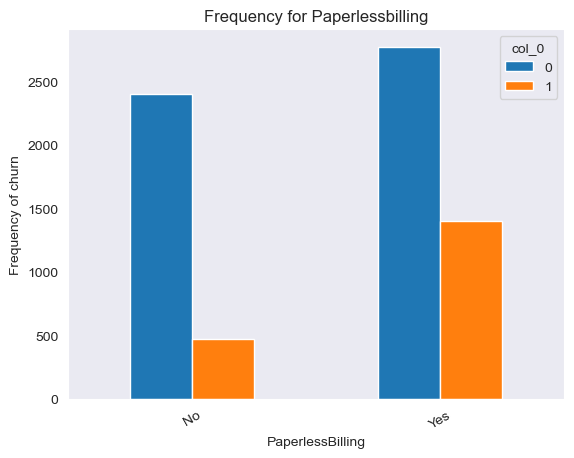

Yes
of 4168 Yes in PaperlessBilling 33.6% churned


No
of 2864 No in PaperlessBilling 16.4% churned




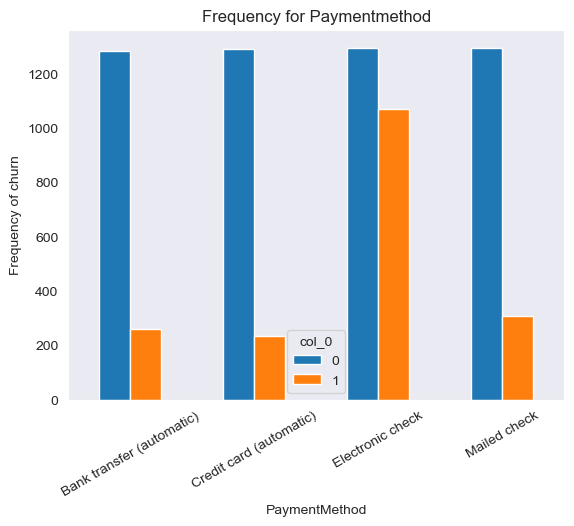

Electronic check
of 2365 Electronic check in PaymentMethod 45.3% churned


Mailed check
of 1604 Mailed check in PaymentMethod 19.2% churned


Bank transfer (automatic)
of 1542 Bank transfer (automatic) in PaymentMethod 16.7% churned


Credit card (automatic)
of 1521 Credit card (automatic) in PaymentMethod 15.3% churned




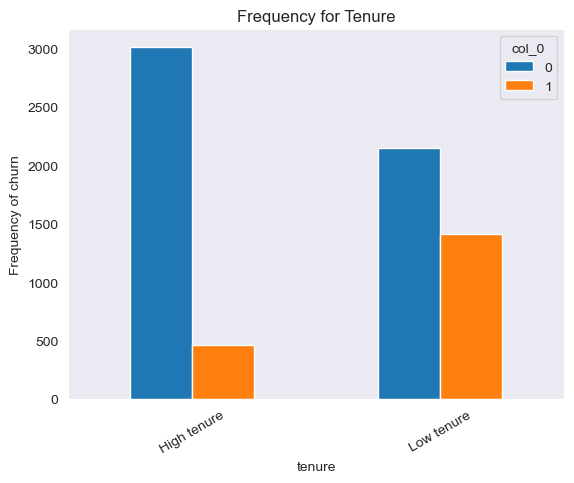

Low tenure
of 3558 Low tenure in tenure 39.6% churned


High tenure
of 3474 High tenure in tenure 13.2% churned




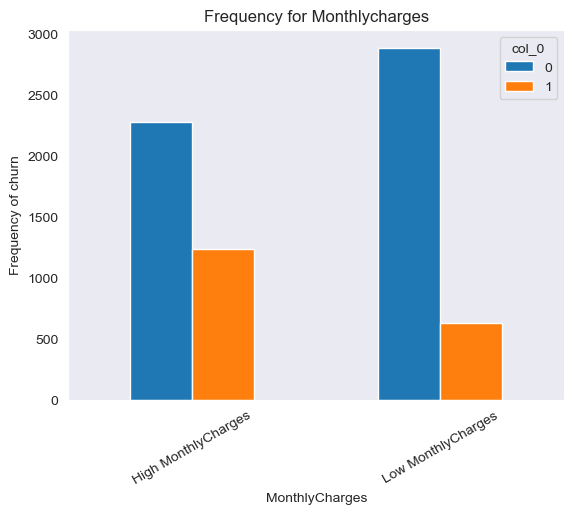

Low MonthlyCharges
of 3519 Low MonthlyCharges in MonthlyCharges 18.0% churned


High MonthlyCharges
of 3513 High MonthlyCharges in MonthlyCharges 35.2% churned




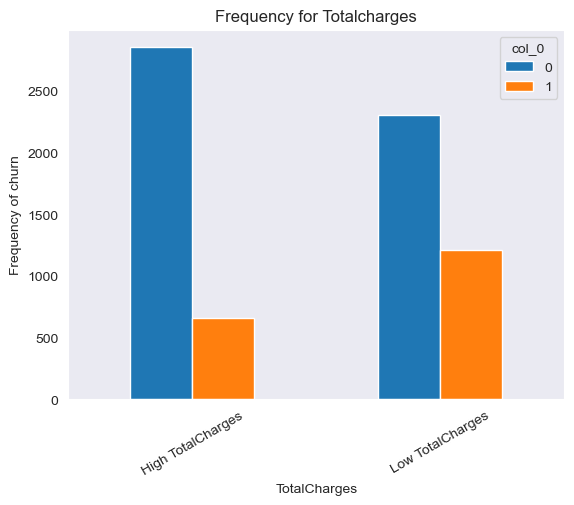

Low TotalCharges
of 3516 Low TotalCharges in TotalCharges 34.4% churned


High TotalCharges
of 3516 High TotalCharges in TotalCharges 18.8% churned




In [37]:
info=pd.DataFrame(columns=['Feature','Max_churning','Max_Churn %','Min_churning','Min_Churn %'])
for col in data.columns[:-1]:
    # plotting the group barchart
    pd.crosstab(data[col],churn).plot(kind='bar')
    plt.title('Frequency for '+col.capitalize())
    plt.xlabel(col)
    plt.ylabel('Frequency of churn')
    plt.xticks(rotation=30)
    plt.show()
    
    # in each feature, calculate the max and minimum churn percentage of each unique value in the feature
    max_churn=data[[col,'Churn']].groupby(col,as_index=False).mean()['Churn'].max()
    min_churn=data[[col,'Churn']].groupby(col,as_index=False).mean()['Churn'].min()
    top_churning=data[[col,'Churn']].groupby(col,as_index=False).mean().sort_values('Churn',ascending=False)[col].iloc[0]
    less_churning=data[[col,'Churn']].groupby(col,as_index=False).mean().sort_values('Churn',ascending=False)[col].iloc[-1]
    
    # append the feature name, max churn percentage and min churn percentage to a dataframe
    info=pd.concat([info,pd.DataFrame([[col,top_churning,max_churn,less_churning,min_churn]],columns=info.columns)], ignore_index=True)
    
    for y in data[col].unique():
        print(y)
        print('of',len(data[col][(data[col]==y)]), y, 'in',col,str(round(len(data[col][(data[col]==y)&(data['Churn']==1)])/len(data[col][(data[col]==y)]) *100,1))+'%','churned')
        print()
        print()
        
# for each feature, get the difference between the max churn and min churn and sort on the difference
info['Churn_%_Diff']=info['Max_Churn %']-info['Min_Churn %']
info.sort_values('Churn_%_Diff',ascending=False,inplace=True) 

## Top 5 factors whose variability had maximum effect on churn rate

In [38]:
info.head()

,Feature,Max_churning,Max_Churn %,Min_churning,Min_Churn %,Churn_%_Diff
12,Contract,Month-to-month,0.427097,Two year,0.028487,0.398610
5,InternetService,Fiber optic,0.418928,No,0.074342,0.344586
6,OnlineSecurity,No,0.417787,No internet service,0.074342,0.343445
9,TechSupport,No,0.416475,No internet service,0.074342,0.342133
7,OnlineBackup,No,0.399417,No internet service,0.074342,0.325075


### Observation
- Customers on Month-to-month contract are 39% more likely to churn when compared with customers on 2-year contract 
- customers on Fibre optic internet service are 30% more likely to churn when compared with customers with no internet service or DSL
- customers with no Tech support are 34% more likely to churn when compared with customers with Tech support
- customers with no online backup are 32% more likely to churn when compared with customers with no online backup

## Filter the Data to include only churned customers and top 5 features
- visualize how these top 5 factors varies in churned customers

In [39]:
churned_data=data[data['Churn']==1][data.columns & list(info.head()['Feature'])]

In [40]:
churned_data.head()

,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract
2,DSL,Yes,Yes,No,Month-to-month
4,Fiber optic,No,No,No,Month-to-month
5,Fiber optic,No,No,No,Month-to-month
8,Fiber optic,No,No,Yes,Month-to-month
13,Fiber optic,No,Yes,No,Month-to-month


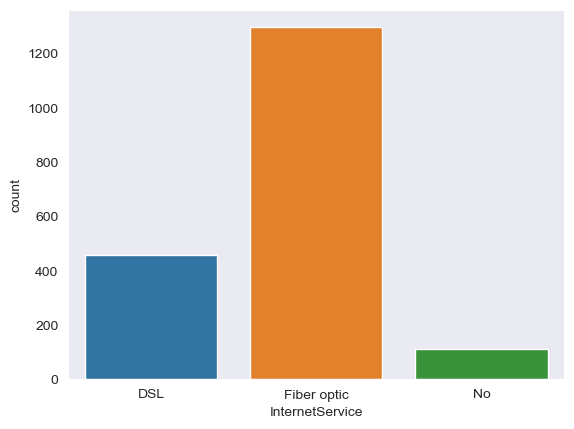

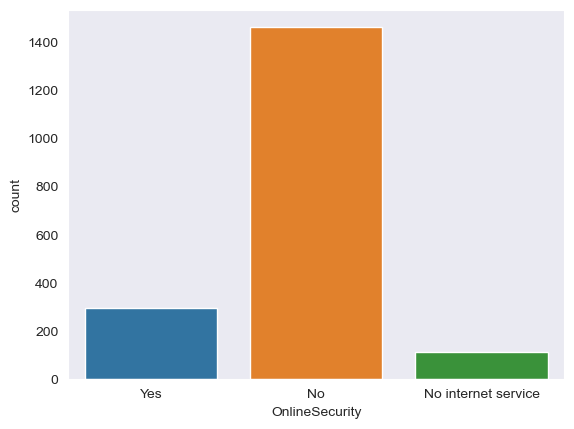

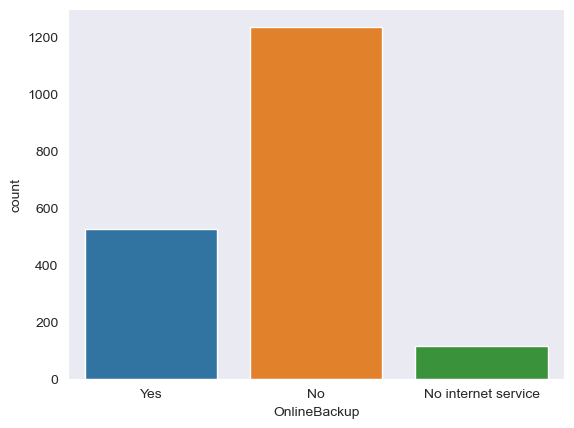

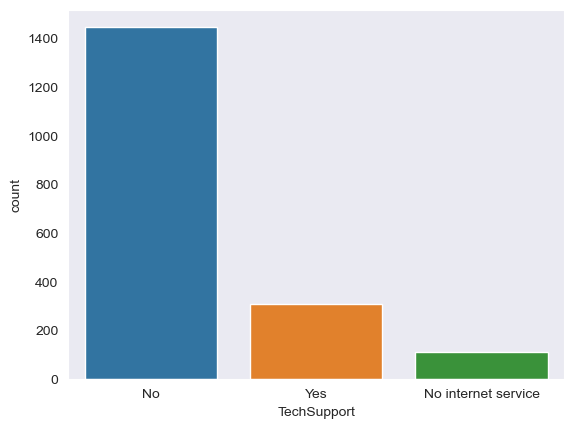

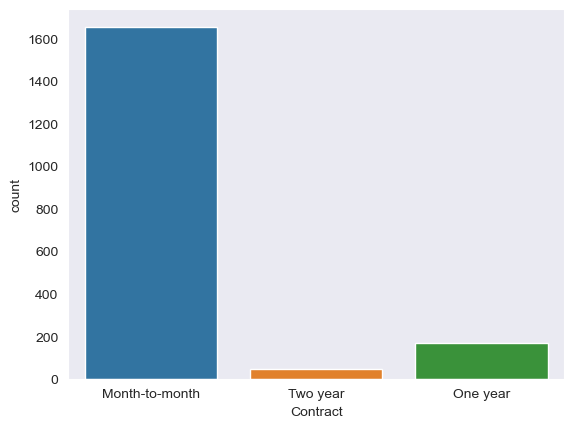

In [41]:
for col in churned_data.columns:
    sns.countplot(x=col,data=churned_data)
    plt.show()
plt.show()

# Business Insights

- Add more discount to the 1 and 2 years plans to enable more people subscribe to them
- Create plans and strategies to make customers depend more online backup
- Move customers from fiberoptics to dsl as there might be presistent issues with the fibre optics internet connection
- Create Tech support awareness to customers
- Provide customers with more assurance of online security